<a href="https://colab.research.google.com/github/Rushi-2003/CODSOFT/blob/main/CODSOFT_TASK_1_TITANIC_SURVIVAL_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly as px
import plotly.graph_objects as go
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


                     
                     DATA PROCESSING

In [2]:
#load the data from csv file to pandas data frame
titanic_data = pd.read_csv('/content/tested.csv')


In [3]:
#pri nting the first 5 rows of the data frame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# number of rows and columns
titanic_data.shape

(418, 12)

In [5]:
#getting some information from dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

    HANDLING WITH MISSING VALUES

In [7]:
#drop the 'cabin' column from the dataframe
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [9]:
# replacing the missing values in "Age" column with mean value
titanic_data ['Age']. fillna(titanic_data['Age'].mean(),inplace= True)
titanic_data ['Fare']. fillna(titanic_data['Fare'].mean(),inplace= True)

In [8]:
# check the number of missing values in each column
titanic_data.isnull().sum()


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
# Load the Titanic dataset
titanic_data = pd.read_csv('tested.csv')

# Display the first few rows of the dataset to understand its structure
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [12]:
# Set the fare value to zero for passengers in Class 1
titanic_data.loc[titanic_data['Pclass'] == 1, 'Fare'] = 0


In [13]:
# check the number of missing values in each column
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

                        STATISTICAL ANALYSIS

In [14]:
#statistical analysis of given data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,11.435362
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,12.806173
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,7.895800
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,14.454200
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,73.500000


In [15]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

        DATA VISUALIZATION

In [16]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

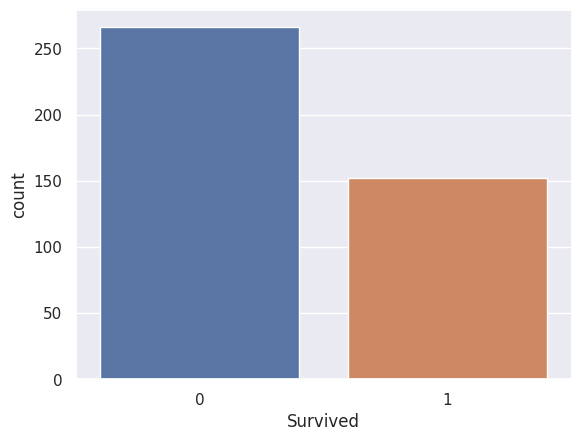

In [17]:
sns.countplot( x=titanic_data['Survived'])

<Axes: xlabel='Fare', ylabel='count'>

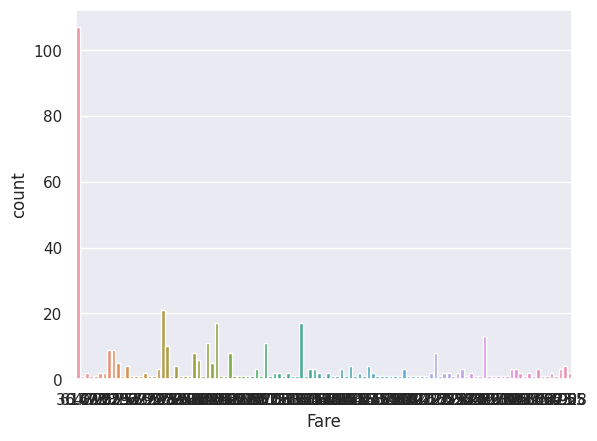

In [18]:
sns.countplot( x= titanic_data['Fare'])

<Axes: xlabel='Embarked', ylabel='count'>

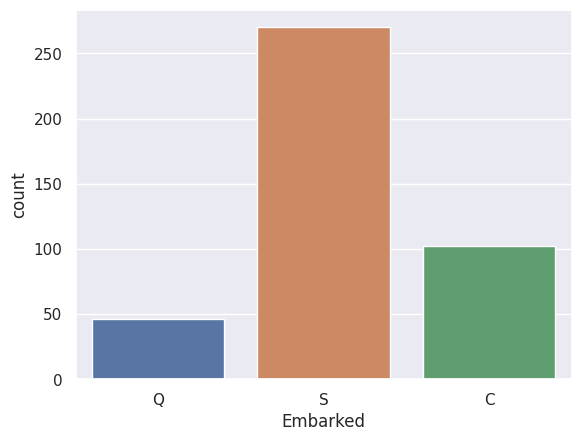

In [19]:
sns.countplot(x = titanic_data['Embarked'])

<Axes: xlabel='Pclass', ylabel='count'>

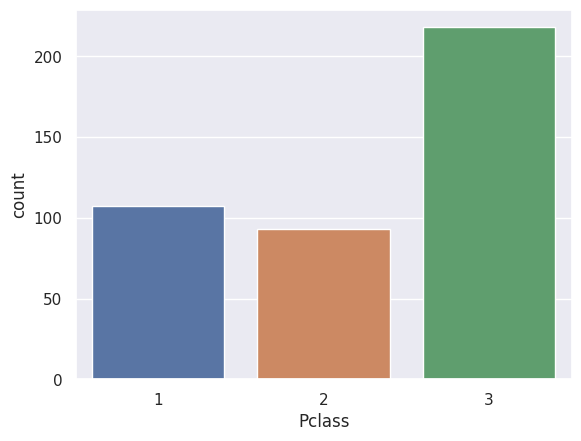

In [20]:
sns.countplot(x = titanic_data['Pclass'])

<Axes: xlabel='Ticket', ylabel='count'>

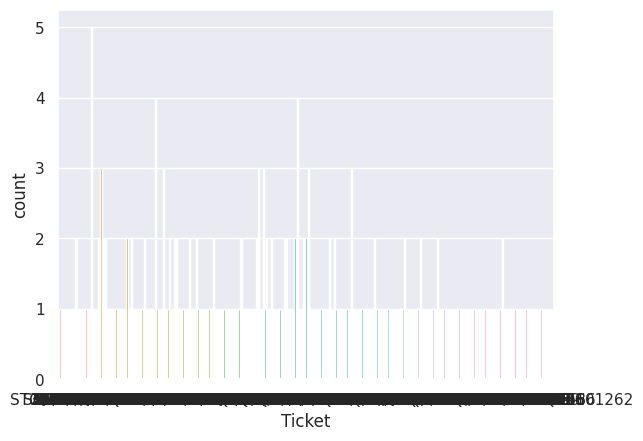

In [21]:
sns.countplot(x = titanic_data['Ticket'])

<Axes: xlabel='Age', ylabel='count'>

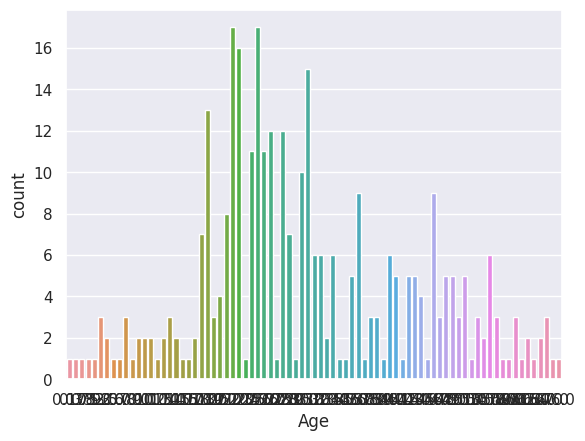

In [22]:
sns.countplot(x = titanic_data['Age'])

In [23]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

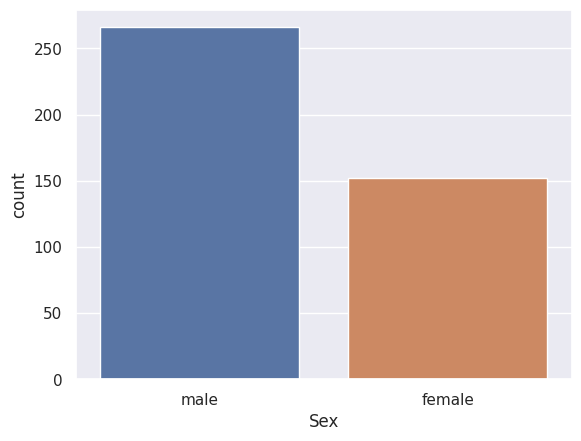

In [24]:
#making a countplot for "Sex" column
sns.countplot(x='Sex', data=titanic_data )

<Axes: xlabel='Sex', ylabel='count'>

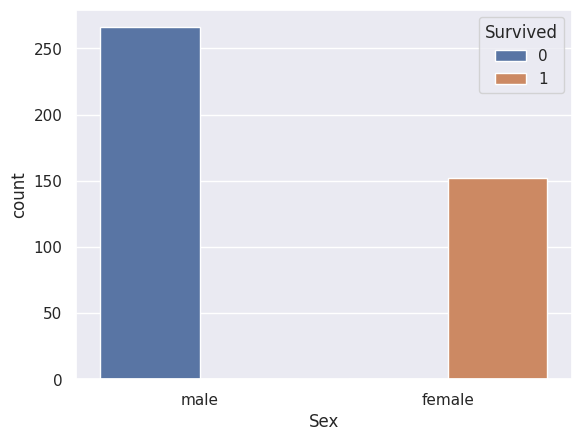

In [25]:
#number of survivors gender wise
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

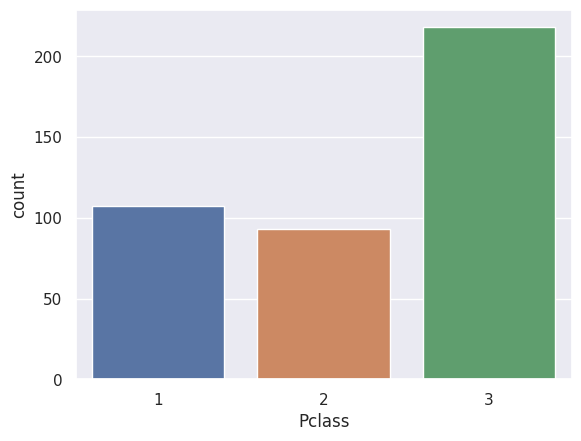

In [26]:
#making a countplot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data )

<Axes: xlabel='Pclass', ylabel='count'>

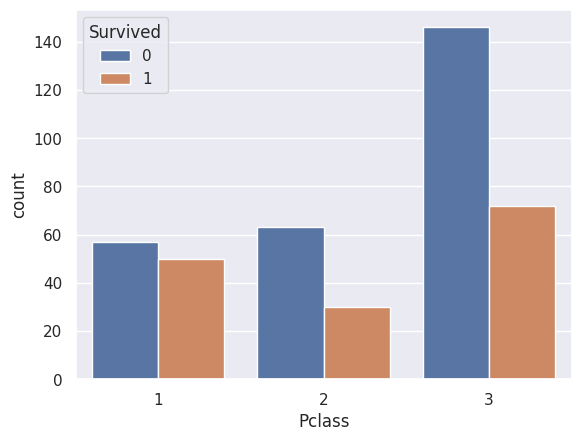

In [27]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

                      ENCODING

In [28]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [29]:
titanic_data['Sex'].value_counts()


male      266
female    152
Name: Sex, dtype: int64

In [30]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [32]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [33]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0         3    0  34.5      0      0   7.8292   NaN         2
1         3    1  47.0      1      0   7.0000   NaN         0
2         2    0  62.0      0      0   9.6875   NaN         2
3         3    0  27.0      0      0   8.6625   NaN         0
4         3    1  22.0      1      1  12.2875   NaN         0
..      ...  ...   ...    ...    ...      ...   ...       ...
413       3    0   NaN      0      0   8.0500   NaN         0
414       1    1  39.0      0      0   0.0000  C105         1
415       3    0  38.5      0      0   7.2500   NaN         0
416       3    0   NaN      0      0   8.0500   NaN         0
417       3    0   NaN      1      1  22.3583   NaN         1

[418 rows x 8 columns]


In [34]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(418, 8) (334, 8) (84, 8)


           MODEL TRAINING

        LOGISTIC REGRESSION

In [37]:
model = LogisticRegression()

In [39]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

ValueError: ignored

      MODEL EVALUATION

    ACCURACY SCORE

In [40]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

ValueError: ignored

In [ ]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
